
*Facial detection*<br>
Making a security system<br>
that can save:<br>
1) a video when motion is detected<br>
2) a picture of the face if is detected<br>


In [1]:
# We will import some key modules here
import cv2 as opencv    # computer vision library
import numpy as np      # mathematical library for array manipulation
import matplotlib.pyplot as plt   #
%matplotlib inline
import time                       #

<u>opencv has some built in facial classifiers:</u>

A computer program that decides whether an image is a positive image (face image) or negative image (non-face image) is called a classifier.

<u>why we are using classifiers:</u>

A classifier is trained on hundreds of thousands of face and non-face images to learn how to classify a new image correctly.

<u>OpenCV provides us with two pre-trained and ready to be used for face detection classifiers:</u>
<br>
<b>phew</b>

* Haar Classifier
* LBP Classifier

<u><b>NOTE:</b></u><br>
Both of these classifiers process images in gray scales, basically because we don't need color information to decide if a picture has a face.

In [2]:
"""
To remove the hassle of constantly converting to color
"""
def convertToRGB(img): 
    return opencv.cvtColor(img, opencv.COLOR_BGR2RGB)

## proof of concept on images

In [3]:
# load test image
test_image_1 = opencv.imread('elon.jpg')
test_image_2 = opencv.imread('elon2.jpg')

(-0.5, 619.5, 425.5, -0.5)

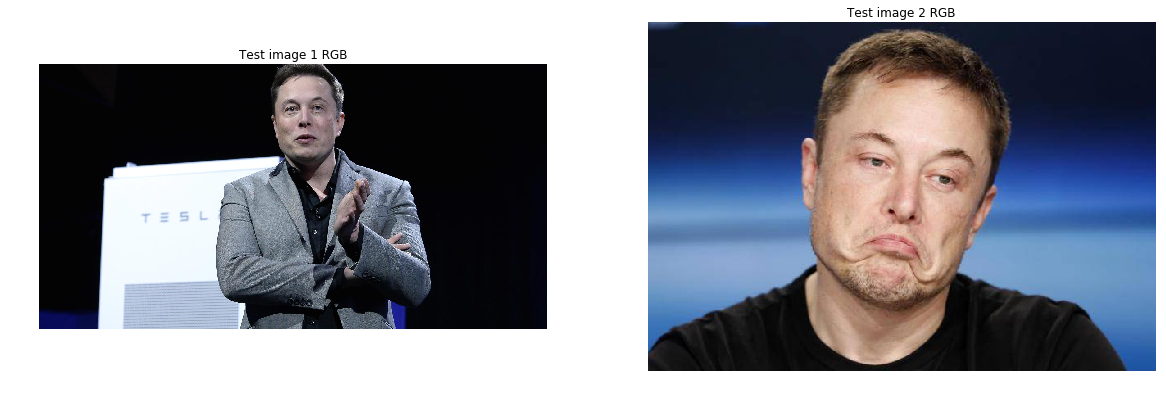

In [4]:
# showing test images
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

a=fig.add_subplot(1,2,1)
plt.imshow(opencv.cvtColor(test_image_1, opencv.COLOR_BGR2RGB))
a.set_title('Test image 1 RGB')
plt.axis('off')

a=fig.add_subplot(1,2,2)
plt.imshow(opencv.cvtColor(test_image_2, opencv.COLOR_BGR2RGB))
a.set_title('Test image 2 RGB')
plt.axis('off')

In [5]:
# convert the test image to gray image as opencv face detector expects gray images 
gray_test_image_1 = opencv.cvtColor(test_image_1, opencv.COLOR_BGR2GRAY)

gray_test_image_2 = opencv.cvtColor(test_image_2, opencv.COLOR_BGR2GRAY)

(-0.5, 619.5, 425.5, -0.5)

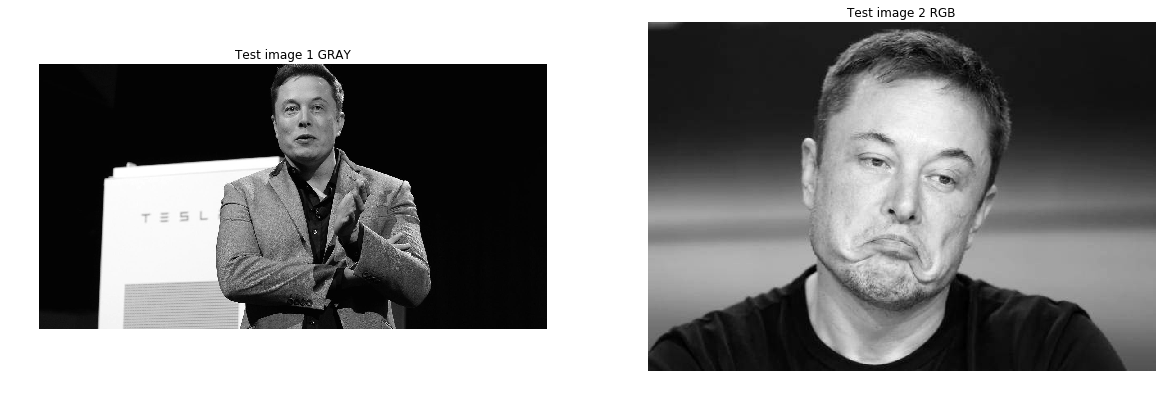

In [6]:
# showing test images
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

a=fig.add_subplot(1,2,1)
plt.imshow(gray_test_image_1, cmap='gray')  
a.set_title('Test image 1 GRAY')
plt.axis('off')

a=fig.add_subplot(1,2,2)
plt.imshow(gray_test_image_2, cmap='gray')  
a.set_title('Test image 2 RGB')
plt.axis('off')

In [7]:
# load cascade classifier training file for haarcascade 
#haar_face_cascade = opencv.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
#load cascade classifier training file for lbpcascade 
lbp_face_cascade = opencv.CascadeClassifier('./data/lbpcascade_frontalface.xml')
haar_face_cascade = lbp_face_cascade

In [8]:
# let's detect multiscale (some images may be closer to camera than others) images 
faces = haar_face_cascade.detectMultiScale(gray_test_image_1, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# print the number of faces found 
print('Faces found: ', len(faces))

Faces found:  1


In [9]:
# go over list of faces and draw them as rectangles on original colored 
for (x, y, w, h) in faces:     
    opencv.rectangle(test_image_1, (x, y), (x+w, y+h), (0, 255, 0), 2)

(-0.5, 1909.5, 999.5, -0.5)

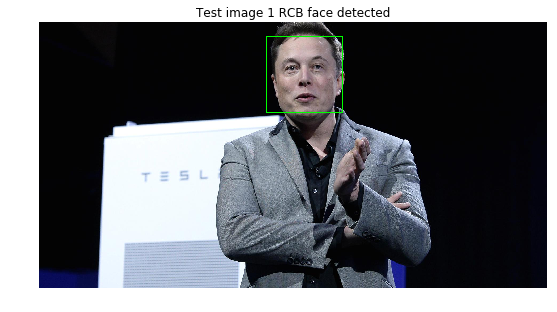

In [10]:
#convert image to RGB and show image 

# showing test images
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

a=fig.add_subplot(1,2,1)
plt.imshow(convertToRGB(test_image_1))
a.set_title('Test image 1 RCB face detected')
plt.axis('off')


# // removed because it showed a small image
#convert image to RGB and show image 
#plt.imshow(convertToRGB(test_image_1))

In [11]:
faces = haar_face_cascade.detectMultiScale(gray_test_image_2, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
print('Faces found: ', len(faces))

Faces found:  1


In [12]:
#go over list of faces and draw them as rectangles on original colored 
for (x, y, w, h) in faces:     
    opencv.rectangle(test_image_2, (x, y), (x+w, y+h), (0, 255, 0), 2)

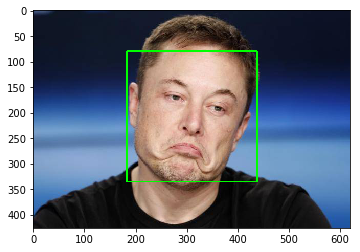

In [13]:
#convert image to RGB and show image 
plt.imshow(convertToRGB(test_image_2))

We see our code works and now the objective is to have a reuseable script<br>
The next step is making a function to have our code implemented recursively.

# Using functions

In [14]:
def detect_faces(haar_face_cascade, RGB_image_or_frame):
    scaleFactor = 1.1  
 
    # convert the test image to gray image as opencv face detector expects gray images
    grayscale_version = opencv.cvtColor(RGB_image_or_frame, opencv.COLOR_BGR2GRAY) 
    #grayscale_numpy_version = np.array(grayscale_version, dtype='uint8')
 
    # let's detect multiscale (some images may be closer to camera than others) images
    faces = haar_face_cascade.detectMultiScale(grayscale_version, scaleFactor=scaleFactor, minNeighbors=5, minSize=(30, 30));          
 
    # go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:         
        opencv.rectangle(RGB_image_or_frame, (x, y), (x+w, y+h), (0, 255, 0), 2) 
        #opencv.rectangle(grayscale_version, (x, y), (x+w, y+h), (0, 255, 0), 2) 
 
    return RGB_image_or_frame
    #return grayscale_version

In [15]:
def display_annotated_image(faces_detected_image):
    picture = plt.figure()
    picture.set_figheight(20)
    picture.set_figwidth(20)

    display = picture.add_subplot(1,2,1)
    # convert image to RGB and show image 
    plt.imshow(convertToRGB(faces_detected_image))
    #plt.imshow(faces_detected_image, cmap='gray')  

    a.set_title('faces detected')
    plt.axis('off')

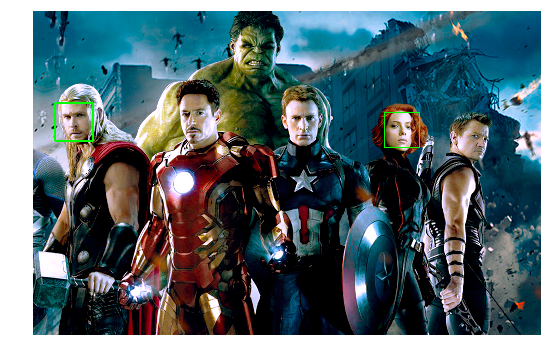

In [16]:
# load another image 
RGB_image_or_frame = opencv.imread('data/avengers.png')

# call our function to detect faces 
faces_detected_image = detect_faces(haar_face_cascade, RGB_image_or_frame)  

# call to display the annotated image
display_annotated_image(faces_detected_image)


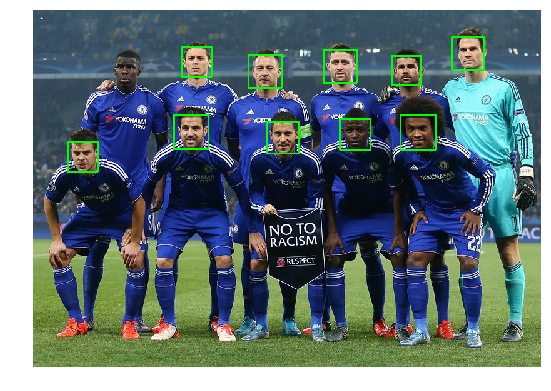

In [17]:
# load another image 
RGB_image_or_frame = opencv.imread('data/line-up.jpg')

# call our function to detect faces 
faces_detected_image = detect_faces(haar_face_cascade, RGB_image_or_frame)  

# call to display the annotated image
display_annotated_image(faces_detected_image)


In [18]:
"""
Using the webcam.
"""

'\nUsing the webcam.\n'

In [19]:
video_capture = opencv.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    #gray = opencv.cvtColor(frame, opencv.COLOR_BGR2GRAY)
    
    # call our function to detect faces 
    faces_detected_image = detect_faces(haar_face_cascade, frame)  
    opencv.imshow('Video', frame)    

    if opencv.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
opencv.destroyAllWindows()

